In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt

D = {'death_rate': np.array([6.2300e-03, 4.4000e-04, 2.7000e-04, 2.0000e-04, 1.6000e-04,
       1.2000e-04, 1.1000e-04, 1.1000e-04, 1.2000e-04, 1.1000e-04,
       1.0000e-04, 1.3000e-04, 1.3000e-04, 1.5000e-04, 2.0000e-04,
       2.5000e-04, 3.7000e-04, 4.7000e-04, 6.4000e-04, 7.1000e-04,
       7.6000e-04, 8.7000e-04, 8.7000e-04, 8.8000e-04, 9.4000e-04,
       9.2000e-04, 9.5000e-04, 9.3000e-04, 9.9000e-04, 1.0100e-03,
       1.0300e-03, 1.0900e-03, 1.1000e-03, 1.1400e-03, 1.1500e-03,
       1.2000e-03, 1.3100e-03, 1.3700e-03, 1.4600e-03, 1.5600e-03,
       1.6200e-03, 1.8500e-03, 2.0100e-03, 2.1600e-03, 2.4300e-03,
       2.5800e-03, 2.9800e-03, 3.2500e-03, 3.5100e-03, 3.8700e-03,
       4.1300e-03, 4.5400e-03, 4.9400e-03, 5.3300e-03, 5.7100e-03,
       6.0200e-03, 6.7000e-03, 7.1000e-03, 7.6900e-03, 8.2800e-03,
       8.6000e-03, 9.3200e-03, 9.9800e-03, 1.1010e-02, 1.2500e-02,
       1.2820e-02, 1.4040e-02, 1.5150e-02, 1.6870e-02, 1.8300e-02,
       1.9670e-02, 2.1330e-02, 2.3470e-02, 2.5620e-02, 2.8000e-02,
       3.0830e-02, 3.4410e-02, 3.7110e-02, 4.1260e-02, 4.4480e-02,
       4.9640e-02, 5.5390e-02, 6.1490e-02, 6.8030e-02, 7.6730e-02,
       8.5610e-02, 9.5400e-02, 1.0636e-01, 1.1802e-01, 1.3385e-01,
       1.5250e-01, 1.6491e-01, 1.8738e-01, 2.0757e-01, 2.2688e-01,
       2.5196e-01, 2.7422e-01, 2.9239e-01, 3.2560e-01, 3.4157e-01]), 'population': np.array([3.94415, 3.97807, 4.09693, 4.11904, 4.06317, 4.05686, 4.06638,
       4.03058, 4.04649, 4.14835, 4.17254, 4.11442, 4.10624, 4.11801,
       4.16598, 4.24282, 4.31614, 4.39529, 4.50085, 4.58523, 4.51913,
       4.35429, 4.26464, 4.19857, 4.24936, 4.26235, 4.15231, 4.24887,
       4.21525, 4.22308, 4.28567, 3.97022, 3.98685, 3.88015, 3.83922,
       3.95643, 3.80209, 3.93445, 4.12188, 4.3648 , 4.38327, 4.11498,
       4.0761 , 4.10511, 4.2115 , 4.50887, 4.51976, 4.53526, 4.5388 ,
       4.6059 , 4.66029, 4.46463, 4.50085, 4.38035, 4.292  , 4.25471,
       4.03751, 3.93639, 3.79493, 3.64127, 3.62113, 3.4926 , 3.56318,
       3.48388, 2.65713, 2.68076, 2.63914, 2.64936, 2.32367, 2.14232,
       2.04312, 1.94932, 1.86427, 1.73696, 1.68449, 1.62008, 1.47107,
       1.45533, 1.40012, 1.37119, 1.30851, 1.21287, 1.16142, 1.07481,
       0.98572, 0.91472, 0.81421, 0.71291, 0.64062, 0.538  , 0.43556,
       0.34499, 0.28139, 0.21698, 0.16944, 0.12972, 0.09522, 0.06814,
       0.0459 , 0.03227]), 'birth_rate': np.array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.0002 , 0.0002 , 0.0002 , 0.0002 ,
       0.0002 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.045  ,
       0.045  , 0.045  , 0.045  , 0.045  , 0.05415, 0.05415, 0.05415,
       0.05415, 0.05415, 0.04825, 0.04825, 0.04825, 0.04825, 0.04825,
       0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0051 , 0.0051 ,
       0.0051 , 0.0051 , 0.0051 , 0.00035, 0.00035, 0.00035, 0.00035,
       0.00035, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     ])}

# 9.1 Linear Dynamical Systems

In [2]:
A = np.matrix([[.97,.1,-.05],[-.3,.99,.05],[.01,-.04,.96]]) 
#dynamics matrix where each row represents coefficients affecting one variable
initX = np.array([1,0,-1]) #the variables for each row^
time = 50
storeinstances = np.zeros((len(initX),time-1))
stateTraj = np.vstack((initX,storeinstances.transpose())).transpose()
np.shape(stateTraj), stateTraj

((3, 50),
 array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [3]:
for t in range(time-1):
    #J: stateTraj[:,t+1] = A*state_traj[:,t]
    stateTraj[:,t+1] = np.matmul(A,stateTraj[:,t])
    #[:,t] is grabbing each column as an array, which numpy handles the same as Julia
    #matmul is getting the sum of multiplying each item in the array grabbed by [:,t] with their respective row in A
stateTraj[:,1]

array([ 1.02, -0.35, -0.95])

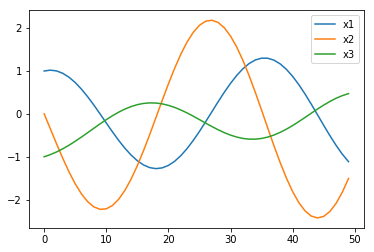

In [4]:
[plt.plot(range(time),stateTraj[i]) for i in range(len(stateTraj))]
plt.legend(["x1","x2","x3"])

# 9.2 Population Dynamics

In [5]:
population = D['population']
deathRate = D['death_rate']
birthRate = D['birth_rate']
'pop:',population[20:25],'death:',deathRate[20:25],'birth:',birthRate[20:25]

('pop:',
 array([4.51913, 4.35429, 4.26464, 4.19857, 4.24936]),
 'death:',
 array([0.00076, 0.00087, 0.00087, 0.00088, 0.00094]),
 'birth:',
 array([0.045, 0.045, 0.045, 0.045, 0.045]))

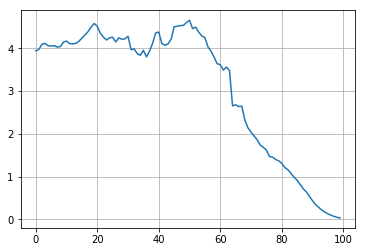

In [6]:
plt.plot(population)
plt.grid(True)
#population in millions at each age (US 2010)

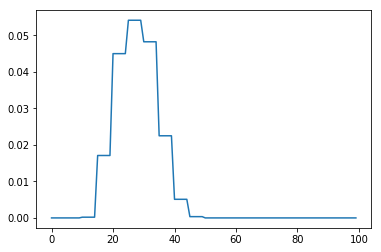

In [7]:
plt.plot(birthRate)
#proportion of ages at which adults gave birth to a child (US 2010)

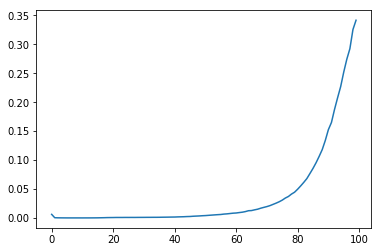

In [8]:
plt.plot(deathRate)
#proportion of ages at which adults died (US 2010)

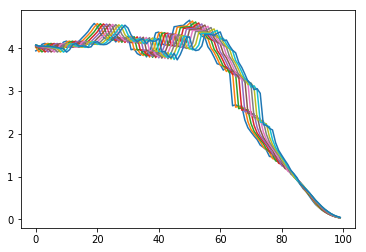

In [9]:
# Make a dynamics matrix representing birth and death rates 
diagDeath = np.diag(1-deathRate[0:len(deathRate)-1])
zerosDeath = np.vstack(np.zeros(len(diagDeath)))
A = np.block([[birthRate],[diagDeath,zerosDeath]])

    
plt.plot(population)
pop2 = D["population"]
#iterate however (k) many years you want to simulate
for k in range(10):
    pop2 = np.matmul(A,pop2)
    plt.plot(pop2)

#population age shifting to the right  
#and population count shiting down slightly over k (10) years

# 9.3 Epidemic Dynamics

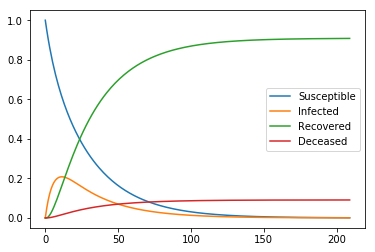

In [10]:
T  = 210 #number of days
A = np.matrix([[.95,.04,0,0],[.05,.85,0,0],[0,.1,1,0],[0,.01,0,1]]) #dynamics matrix
x1 = np.array([1,0,0,0]) #initial state: everyone healthy
stateTraj = np.hstack([np.vstack(x1),np.zeros((4,T-1))]) #initialize trajectory with 0s
for t in range(T-1):
    stateTraj[:,t+1] = np.matmul(A,stateTraj[:,t])

for i in range(len(stateTraj)):
    plt.plot(range(T),stateTraj[i])

plt.legend(["Susceptible","Infected","Recovered","Deceased"])

# 9.4 Motion of a Mass

In [11]:
h,m,eta = .01,1,1
A = np.matrix([[1,h],[0, 1-h*eta/m]])
B = np.matrix([[0],[h/m]])
x1 = np.array([0,0])
K = 300 #3 second simulation
f = np.zeros(K)
f[50:99] = 1.0
f[100:139] = -1.3
X = np.hstack([np.vstack(x1),np.zeros((2,K-1))])

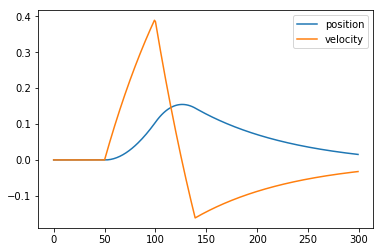

In [12]:
for k in range(K-1):
    X[:,k+1] = np.matmul(A,X[:,k]) + np.hstack(B*f[k])

plt.plot(X[0])
plt.plot(X[1])
plt.legend(["position","velocity"])

# 9.5 Supply Chain Dynamics

In [13]:
#Nothing in Julia companion but textbook has an incidence matrix 
#and dynamics matrix plotted on a graph that networkX might be able to do